In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [2]:
#In this sections we loaded the dataset and split into X and y sets.
#We pulled from the data the features to get the important info we needed.
#Lastly, we made the data fit in a dataframe using pandas.
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

df = pd.DataFrame(X, columns = diabetes.feature_names)
df['Risk'] = y
print("Dataset: ")
print(df.head())
print("\nDataset shape: ", df.shape)

Dataset: 
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6   Risk  
0 -0.002592  0.019907 -0.017646  151.0  
1 -0.039493 -0.068332 -0.092204   75.0  
2 -0.002592  0.002861 -0.025930  141.0  
3  0.034309  0.022688 -0.009362  206.0  
4 -0.002592 -0.031988 -0.046641  135.0  

Dataset shape:  (442, 11)


In [3]:
#Here we took the important features and defined them. Proccessing what was needed.
selected_features = ['age', 'sex', 'bp']
X = df[selected_features]
y = df['Risk']

print("\nSelected features: ")
print(X.head())
print(y.head())


Selected features: 
        age       sex        bp
0  0.038076  0.050680  0.021872
1 -0.001882 -0.044642 -0.026328
2  0.085299  0.050680 -0.005670
3 -0.089063 -0.044642 -0.036656
4  0.005383 -0.044642  0.021872
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Risk, dtype: float64


In [4]:
#In this section we split the data into training and testing sets.
#We used x y train and xy test to do this with its proper sizing
#We also scaled the data to be able to fit in these training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print("Training set shape final: ", X_train_scaled.shape)
print("Testing set shape final: ", X_test_scaled.shape)

Training set shape final:  (353, 3)
Testing set shape final:  (89, 3)


In [5]:
#We used the appropriate metric to test on this dataset.
#Using regressing to fit the model and then train it.
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training has finished")


Model training has finished


In [6]:
#Here is where we evaluated the metric to see if it was working correctly.
#We can see that the model was able to find the evaluation.
y_pred = model.predict(X_test_scaled)

mse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {mse:.2f}")

Root Mean Squared Error: 67.06


(np.float64(-0.54),
 np.float64(2.5400000000000005),
 np.float64(0.0),
 np.float64(35.74094201056501))

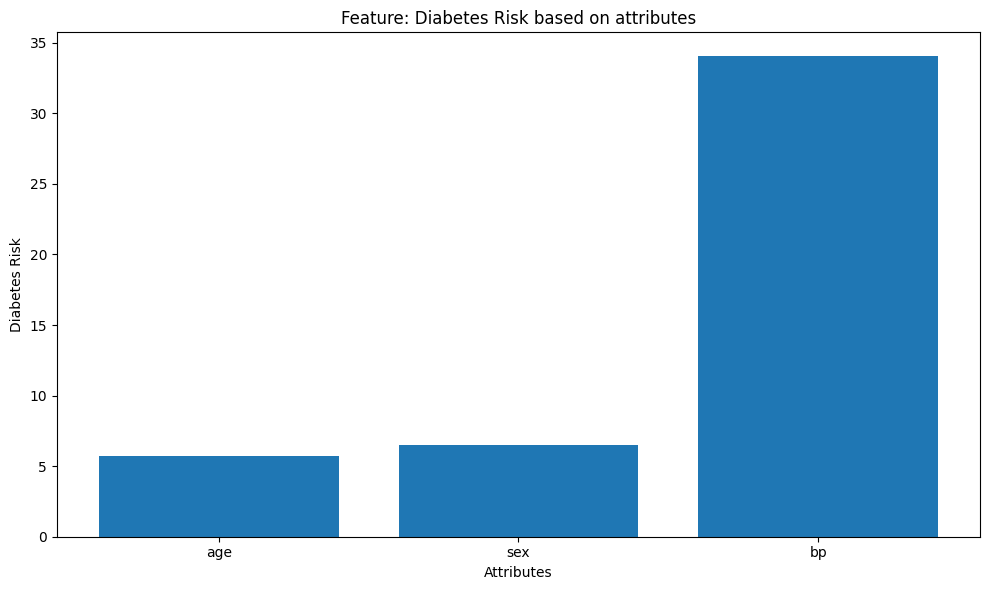

In [7]:
#In this section we used the features to create a visualization.
#Taking the dataframe and creating a bar graph to depict the outcome.
diabetes = pd.DataFrame({'feature': selected_features, 'diabetes': abs(model.coef_)})

importance = diabetes.sort_values('diabetes', ascending=False)

plt.figure(figsize = (10, 6))
plt.bar(diabetes['feature'], diabetes['diabetes'])
plt.title('Feature: Diabetes Risk based on attributes')
plt.xlabel('Attributes')
plt.ylabel('Diabetes Risk')
plt.tight_layout()
plt.axis()